## Optimized SiDB Gate Designs

This project introduces SiDB gates that were designed using
the [Exhaustive Gate Designer](https://www.cda.cit.tum.de/files/eda/2023_nanoarch_minimal_gate_design.pdf). The SiDB
gates have been optimized with several metrics in mind, including [Operational Domain](https://www.cda.cit.tum.de/files/eda/2023_nanoarch_reducing_the_complexity_of_operational_domain_computation_in_silicon_dangling_bond_logic.pdf), Population Stability, and [Critical Temperature](https://www.cda.cit.tum.de/files/eda/2023_ieeenano_temperature_behavior.pdf).
The following gates are designed and analyzed:

1. AND
2. Wire
3. OR
4. Fan-Out

``NOTE: For better visualization, change the notebook theme in settings from light to dark.``


# Overview
+ [AND GATE](#and) 

   - [Electrostatic Ground State Simulation](#and_simulation)
   
       - [Charge Distribution for Input 00](#and_simulation_00)

       - [Charge Distribution for Input 01](#and_simulation_01)

       - [Charge Distribution for Input 10](#and_simulation_10)

       - [Charge Distribution for Input 11](#and_simulation_11)
    
    - [Operational Domain](#and_operational_domain)
      
        - [Operational Domain $(\lambda_{\mathit{tf}}, \mu_{-})$ for fixed $\epsilon_{r} = 5.6$](#and_operational_domain_fixed_epsilon)
     
        - [Operational Domain $(\epsilon_{r}, \lambda_{\mathit{tf}})$ for fixed $\mu_{-} = -0.25\,eV$](#and_operational_domain_fixed_mu)
     
    - [Critical Temperature](#and_critical_temperature)
      
     
2. [WIRE GATE](#wire)
       
    - [Operational Domain](#wire_operational_domain)
      
        - [Operational Domain $(\lambda_{\mathit{tf}}, \mu_{-})$ for fixed $\epsilon_{r} = 5.6$](#wire_operational_domain_fixed_epsilon)
     
        - [Operational Domain $(\epsilon_{r}, \lambda_{\mathit{tf}})$ for fixed $\mu_{-} = -0.25\,eV$](#wire_operational_domain_fixed_mu)
     
    - [Critical Temperature](#wire_critical_temperature)
      
  
3. [OR GATE](#or)
       
    - [Operational Domain](#or_operational_domain)
      
        - [Operational Domain $(\lambda_{\mathit{tf}}, \mu_{-})$ for fixed $\epsilon_{r} = 5.6$](#or_operational_domain_fixed_epsilon)
     
        - [Operational Domain $(\epsilon_{r}, \lambda_{\mathit{tf}})$ for fixed $\mu_{-} = -0.25\,eV$](#or_operational_domain_fixed_mu)
     
    - [Critical Temperature](#or_critical_temperature)
    
  
4. [Fan Out GATE](#fan_out)
       
    - [Operational Domain](#fan_out_operational_domain)
      
        - [Operational Domain $(\lambda_{\mathit{tf}}, \mu_{-})$ for fixed $\epsilon_{r} = 5.6$](#fan_out_operational_domain_fixed_epsilon)
     
        - [Operational Domain $(\epsilon_{r}, \lambda_{\mathit{tf}})$ for fixed $\mu_{-} = -0.25\,eV$](#fan_out_operational_domain_fixed_mu)
     
    - [Critical Temperature](#fan_out_critical_temperature)

#### Install and import ``mnt.pyfiction`` to use all the simulation algorithms we have implemented over the last year.

In [1]:
pip install mnt.pyfiction

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade mnt.pyfiction

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Install multiple required packages

In [3]:
pip install pandas numpy matplotlib ipywidgets IPython

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from mnt.pyfiction import *
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

![logo-nanotech-toolkit-white-high.png](https://github.com/cda-tum/fiction/raw/main/docs/_static/mnt_dark.svg)

<a id='and'></a>
# ``1. AND Gate``

In [7]:
# we also provide a function to read in sqd-files
skeleton = read_sqd_layout_100('../skeleton_bestagons_with_tags/skeleton_hex_inputsdbp_2i1o.sqd')
print(skeleton)

 ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯ 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  

In [35]:
params = design_sidb_gates_params()
params.simulation_parameters.base = 2
params.simulation_parameters.mu_minus = -0.32
params.design_mode = design_sidb_gates_mode.RANDOM
params.canvas = [(16, 13), (22, 24)]
params.number_of_sidbs = 3
params.sim_engine = sidb_simulation_engine.QUICKEXACT

In [36]:
designed_gates = design_sidb_gates(skeleton, [create_and_tt()], params)

In [39]:
layout = designed_gates[0]

In [48]:
type(layout)

mnt.pyfiction.sidb_layout

<a id='and_simulation'></a>
## 1.1 Electrostatic Ground State Simulation

We simulate the electrostatic ground state with [__QuickExact__](https://www.cda.cit.tum.de/files/eda/2024_aspdac_efficient_exact_simulation.pdf) and use the following physical parameters:

In [43]:
physical_parameters = sidb_simulation_parameters()
physical_parameters.base = 2;
physical_parameters.epsilon_r = 5.6
physical_parameters.lambda_tf = 5.0 # (nm)
physical_parameters.mu_minus = -0.25 # (eV) (energy threshold to change the charge state of a negatively charged SiDB to a neutrally charged SiDB)
quickexact_parameter = quickexact_params()
quickexact_parameter.simulation_parameters = physical_parameters

<a id='and_simulation_00'></a>
## 1.1 Charge Distribution for Input 00

In [51]:
layout.assign_cell_type(offset_coordinate(2,2), sidb_technology.cell_type.EMPTY) # delete one SiDB of the input BDL pair 
layout.assign_cell_type(offset_coordinate(24,2), sidb_technology.cell_type.EMPTY) # delete one SiDB of the input BDL pair 
result = quickexact(layout, quickexact_parameter)
print(result.charge_distributions[0]) # print the groundstate ([0])

layout.assign_cell_type(offset_coordinate(2,2), sidb_technology.cell_type.INPUT) # add SiDB of the input BDL pair again to have the original layout
layout.assign_cell_type(offset_coordinate(24,2), sidb_technology.cell_type.INPUT) # add SiDB of the input BDL pair again to have the original layout

TypeError: quickexact(): incompatible function arguments. The following argument types are supported:
    1. (lyt: fiction::sidb_lattice<fiction::sidb_100_lattice, fiction::cell_level_layout<fiction::sidb_technology, fiction::clocked_layout<fiction::tile_based_layout<fiction::cartesian_layout<fiction::offset::ucoord_t> > > >, false>, params: mnt.pyfiction.quickexact_params = <mnt.pyfiction.quickexact_params object at 0x1054e4cf0>) -> mnt.pyfiction.sidb_simulation_result_100
    2. (lyt: fiction::sidb_lattice<fiction::sidb_111_lattice, fiction::cell_level_layout<fiction::sidb_technology, fiction::clocked_layout<fiction::tile_based_layout<fiction::cartesian_layout<fiction::offset::ucoord_t> > > >, false>, params: mnt.pyfiction.quickexact_params = <mnt.pyfiction.quickexact_params object at 0x1054e4e70>) -> mnt.pyfiction.sidb_simulation_result_111

Invoked with: [38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m

[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m[38;2;255;255;000m ◯ [0m[38;2;128;128;128m · [0m[38;2;128;128;128m · [0m
, <mnt.pyfiction.quickexact_params object at 0x105383b70>

Last BDL pair encodes the correct output 0 as desired for an AND-Gate at input 00!

<a id='and_simulation_01'></a>
## 1.1.1 Charge Distribution for Input 01

In [16]:
and_gate.assign_cell_type(offset_coordinate(2,2), sidb_technology.cell_type.EMPTY)
and_gate.assign_cell_type(offset_coordinate(26,0), sidb_technology.cell_type.EMPTY)

result = quickexact(charge_distribution_surface_100(and_gate), quickexact_parameter)
print(result.charge_distributions[0]) # print the groundstate ([0])

and_gate.assign_cell_type(offset_coordinate(2,2), sidb_technology.cell_type.INPUT)
and_gate.assign_cell_type(offset_coordinate(26,0), sidb_technology.cell_type.INPUT)

 ●  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ● 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ●  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ●  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  · 

Last BDL pair encodes the correct output 0 as desired for an AND-Gate at input 01!

<a id='and_simulation_10'></a>
## 1.1.2. Charge Distribution for Input 10

In [18]:
and_gate.assign_cell_type(offset_coordinate(0,0), sidb_technology.cell_type.EMPTY)
and_gate.assign_cell_type(offset_coordinate(24,2), sidb_technology.cell_type.EMPTY)

result = quickexact(charge_distribution_surface_100(and_gate), quickexact_parameter)
print(result.charge_distributions[0]) # print the groundstate ([0])

and_gate.assign_cell_type(offset_coordinate(0,0), sidb_technology.cell_type.INPUT)
and_gate.assign_cell_type(offset_coordinate(24,2), sidb_technology.cell_type.INPUT)

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ● 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ●  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ●  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ●  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  · 

Last BDL pair encodes the correct output 0 as desired for an AND-Gate at input 10!

<a id='and_simulation_11'></a>
## 1.1.3 Charge Distribution for Input 11

In [19]:
and_gate.assign_cell_type(offset_coordinate(0,0), sidb_technology.cell_type.EMPTY)
and_gate.assign_cell_type(offset_coordinate(26,0), sidb_technology.cell_type.EMPTY)

result = quickexact(charge_distribution_surface_100(and_gate), quickexact_parameter)
print(result.charge_distributions[0]) # print the groundstate ([0])

and_gate.assign_cell_type(offset_coordinate(0,0), sidb_technology.cell_type.INPUT)
and_gate.assign_cell_type(offset_coordinate(26,0), sidb_technology.cell_type.INPUT)

 ●  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ● 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ●  ·  ·  ·  ·  ·  ·  ·  ·  ·  ●  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ●  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  

Last BDL pair encodes the correct output 0 as desired for an AND-Gate at input 11. Thus, the SiDB layout fulfills the AND logic for all possible input combinations.

The next step is to analyze the [Operational Domain](https://www.cda.cit.tum.de/files/eda/2023_nanoarch_reducing_the_complexity_of_operational_domain_computation_in_silicon_dangling_bond_logic.pdf) and the [Critical Temperature](https://www.cda.cit.tum.de/files/eda/2023_ieeenano_temperature_behavior.pdf). These two metrics serve as a measure of how stable the gate is to disturbances.

<a id='and_operational_domain'></a>
## 1.2. Operational Domain

SiDBs are inherently prone to inhomogeneity in physical systems, which have been shown to disturb gate operation.
This circumstance is caused by the dependence of the electrostatic interaction on the material-specific parameters $\mu_{-}$, $\epsilon_{r}$ and $\lambda_{\mathit{tf}}$. Consequently, any changes in these values significantly influence the behavior of a given SiDB gate. 

The so-called __Operational Domain__ was proposed as a methodology to evaluate the extent of physical parameter variations that an SiDB logic gate is able to tolerate by plotting the logical correctness of that gate's behavior across a predetermined range of physical parameters. Given an SiDB layout $L$ and a Boolean function $f : \mathbb{B}^n \rightarrow \mathbb{B}^m$, the operational domain of $L$ under $f$ in the $(\lambda_{\mathit{tf}}, \mu_{-})$ space is defined as the set of coordinate points $(\lambda_{\mathit{tf}}, \mu_{-})$ for which $L$ implements $f$. To determine whether $L$ implements $f$ at any given coordinate point $(x, y)$, this point can be _sampled_, i.e., by conducting $2^n$ physical simulations---one for each possible input pattern of $L$---with $\lambda_{\mathit{tf}} = x, \mu_{-} = y$.

Define two functions to plot the operational domain.

In [20]:
# function to print the simulated operational domain
def print_operational_domain_lambda_mu(opdom):
    wodp = write_operational_domain_params()
    wodp.operational_tag = '1'
    wodp.non_operational_tag = '0'
    write_operational_domain(opdom, 'operational_domain.csv', wodp)
    
    # Read data from CSV file
    csv_file = "operational_domain.csv"
    data = pd.read_csv(csv_file)
    
    # Separate data based on operational status
    operational_data = data[data["operational status"] == 1]
    non_operational_data = data[data["operational status"] == 0]
    
    # Extract epsilon_r and lambda_tf values for each group
    epsilon_r_operational = operational_data["lambda_tf"]
    lambda_tf_operational = operational_data["mu_minus"]
    epsilon_r_non_operational = non_operational_data["lambda_tf"]
    lambda_tf_non_operational = non_operational_data["mu_minus"]
    
    # Plot the data with different colors for each group
    plt.figure(figsize=(6, 6))
    plt.plot(epsilon_r_non_operational, lambda_tf_non_operational, "s", markersize=2, color="lightgray", label="non-operational")
    plt.plot(epsilon_r_operational, lambda_tf_operational, "s", markersize=2, color="purple", label="operational")
    plt.xlabel(r'$\lambda_{tf}$ [nm]', fontsize=18)
    plt.ylabel(r'$\mu_{-}$ [eV]', fontsize=18)
    plt.grid(False)
    # set the tick font size
    plt.tick_params(labelsize=15)
    plt.legend(fontsize=12)
    # Adjust subplot parameters
    plt.show()

# function to print the simulated operational domain
def print_operational_domain_epsilon_lambda(opdom):
    wodp = write_operational_domain_params()
    wodp.operational_tag = '1'
    wodp.non_operational_tag = '0'
    write_operational_domain(opdom, 'operational_domain.csv', wodp)
    
    # Read data from CSV file
    csv_file = "operational_domain.csv"
    data = pd.read_csv(csv_file)
    
    # Separate data based on operational status
    operational_data = data[data["operational status"] == 1]
    non_operational_data = data[data["operational status"] == 0]
    
    # Extract epsilon_r and lambda_tf values for each group
    epsilon_r_operational = operational_data["epsilon_r"]
    lambda_tf_operational = operational_data["lambda_tf"]
    epsilon_r_non_operational = non_operational_data["epsilon_r"]
    lambda_tf_non_operational = non_operational_data["lambda_tf"]
    
    # Plot the data with different colors for each group
    plt.figure(figsize=(6, 6))
    plt.plot(epsilon_r_non_operational, lambda_tf_non_operational, "s", markersize=2, color="lightgray", label="non-operational")
    plt.plot(epsilon_r_operational, lambda_tf_operational, "s", markersize=2, color="purple", label="operational")
    plt.xlabel(r'$\epsilon_r$', fontsize=18)
    plt.ylabel(r'$\lambda_{tf}$ [nm]', fontsize=18)
    plt.grid(False)
    # set the tick font size
    plt.tick_params(labelsize=15)
    plt.legend(fontsize=12)
    
    plt.show()

<a id='and_operational_domain_fixed_epsilon'></a>
#### 1.2.1. Operational Domain $(\lambda_{\mathit{tf}}, \mu_{-})$ for fixed $\epsilon_{r} = 5.6$

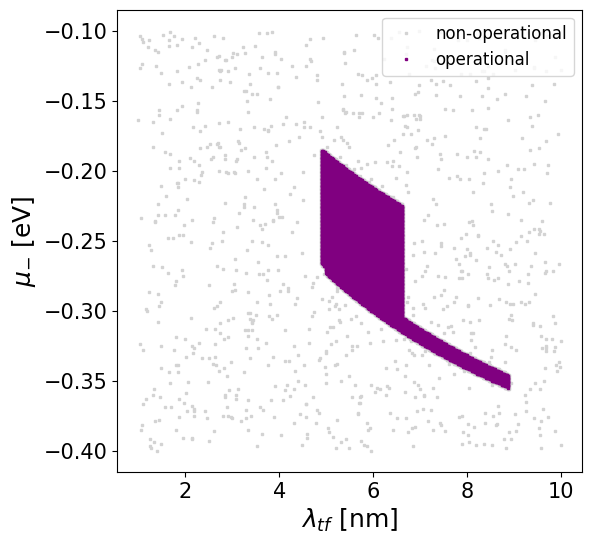

In [24]:
opdom_params_lambda_mu = operational_domain_params()
opdom_params_lambda_mu.simulation_parameters = physical_parameters
opdom_params_lambda_mu.x_dimension = sweep_parameter.LAMBDA_TF
opdom_params_lambda_mu.y_dimension = sweep_parameter.MU_MINUS 
opdom_params_lambda_mu.x_min = 1
opdom_params_lambda_mu.x_max = 10
opdom_params_lambda_mu.x_step = 0.01
opdom_params_lambda_mu.y_min = -0.4
opdom_params_lambda_mu.y_max = -0.1
opdom_params_lambda_mu.y_step = 0.001

opdom = operational_domain_flood_fill(charge_distribution_surface_100(and_gate), [create_and_tt()], 1000, opdom_params_lambda_mu)
print_operational_domain_lambda_mu(opdom)

<a id='and_operational_domain_fixed_mu'></a>
#### 1.2.2. Operational Domain $(\epsilon_{r}, \lambda_{\mathit{tf}})$ for fixed $\mu_{-} = -0.25$ eV

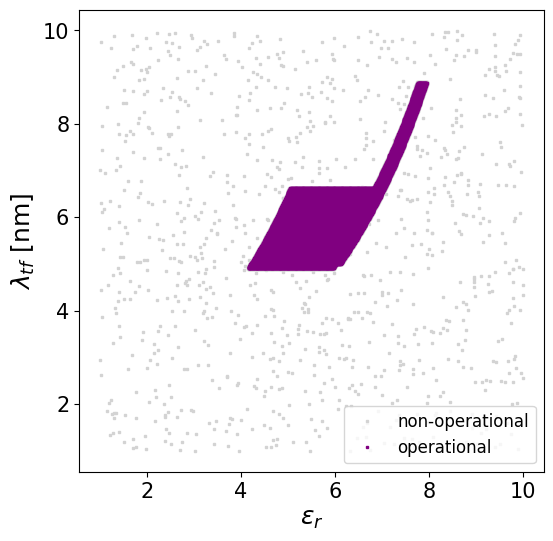

In [27]:
opdom_params_epsilon_lambda = operational_domain_params()
opdom_params_epsilon_lambda.simulation_parameters = physical_parameters
opdom_params_epsilon_lambda.x_dimension = sweep_parameter.EPSILON_R
opdom_params_epsilon_lambda.y_dimension = sweep_parameter.LAMBDA_TF 
opdom_params_epsilon_lambda.x_min = 1
opdom_params_epsilon_lambda.x_max = 10
opdom_params_epsilon_lambda.x_step = 0.01
opdom_params_epsilon_lambda.y_min = 1
opdom_params_epsilon_lambda.y_max = 10
opdom_params_epsilon_lambda.y_step = 0.01

opdom = operational_domain_flood_fill(charge_distribution_surface_100(and_gate), [create_and_tt()], 1000, opdom_params_epsilon_lambda)
print_operational_domain_epsilon_lambda(opdom)

<a id='and_critical_temperature'></a>
## 1.3. Critical Temperature

In [55]:
ct_params = critical_temperature_params()
ct_params.max_temperature = 300
ct_stats = critical_temperature_stats()
critical_temperature_non_gate_based(charge_distribution_surface_100(and_gate), ct_params, ct_stats)
print("The Critical Temperature is \033[1m" + str(ct_stats.critical_temperature) + " Kelvin\033[0m (at higher temperatures, the ground state is occupied with a probability of less than 99 %).")

The Critical Temperature is 31.95 Kelvin (at higher temperatures, the ground state is occupied with a probability of less than 99 %).


<a id='wire'></a>
# ``2. WIRE Gate``

In [30]:
# we also provide a function to read in sqd-files
wire_gate = read_sqd_layout_100('../sidb_gates/sqd/wire_v0.sqd')
print(wire_gate)

 ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  · 

<a id='wire_operational_domain'></a>
## 2.1. Operational Domain

<a id='wire_operational_domain_fixed_epsilon'></a>
#### 2.1.1. Operational Domain for fixed $\epsilon_{r} = 5.6$

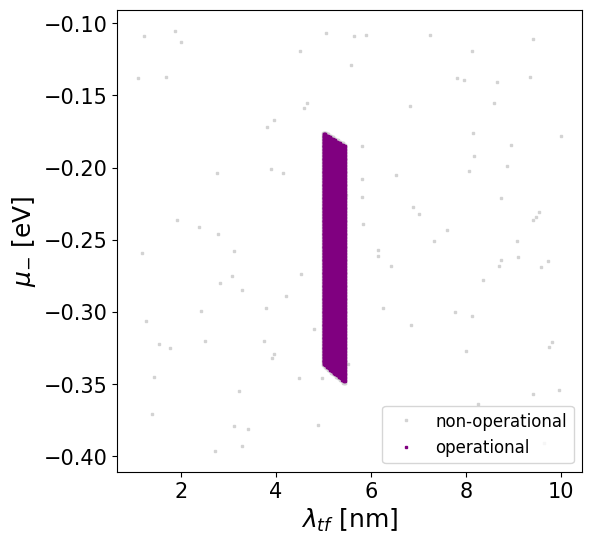

In [34]:
opdom_params_lambda_mu = operational_domain_params()
opdom_params_lambda_mu.simulation_parameters = physical_parameters
opdom_params_lambda_mu.x_dimension = sweep_parameter.LAMBDA_TF
opdom_params_lambda_mu.y_dimension = sweep_parameter.MU_MINUS 
opdom_params_lambda_mu.x_min = 1
opdom_params_lambda_mu.x_max = 10
opdom_params_lambda_mu.x_step = 0.01
opdom_params_lambda_mu.y_min = -0.4
opdom_params_lambda_mu.y_max = -0.1
opdom_params_lambda_mu.y_step = 0.001

opdom = operational_domain_flood_fill(charge_distribution_surface_100(wire_gate), [create_id_tt()], 100, opdom_params_lambda_mu)
print_operational_domain_lambda_mu(opdom)

<a id='wire_operational_domain_fixed_mu'></a>
#### 2.1.2. Operational Domain for fixed $\mu_{-} = -0.25$ eV

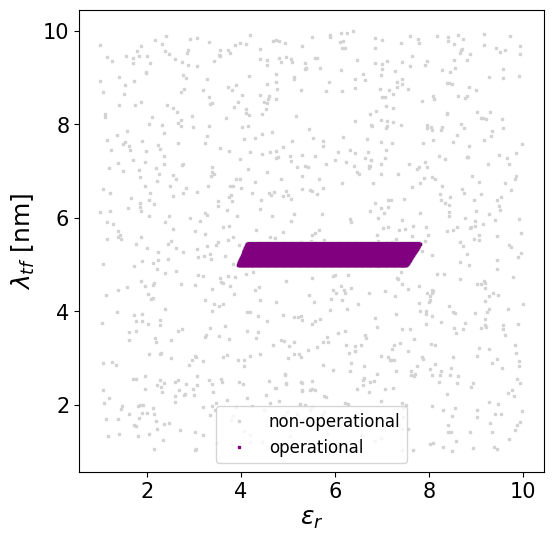

In [37]:
opdom_params_epsilon_lambda = operational_domain_params()
opdom_params_epsilon_lambda.simulation_parameters = physical_parameters
opdom_params_epsilon_lambda.x_dimension = sweep_parameter.EPSILON_R
opdom_params_epsilon_lambda.y_dimension = sweep_parameter.LAMBDA_TF 
opdom_params_epsilon_lambda.x_min = 1
opdom_params_epsilon_lambda.x_max = 10
opdom_params_epsilon_lambda.x_step = 0.01
opdom_params_epsilon_lambda.y_min = 1
opdom_params_epsilon_lambda.y_max = 10
opdom_params_epsilon_lambda.y_step = 0.01

opdom = operational_domain_flood_fill(charge_distribution_surface_100(wire_gate), [create_id_tt()], 1000, opdom_params_epsilon_lambda)
print_operational_domain_epsilon_lambda(opdom)

<a id='wire_critical_temperature'></a>
## 2.2. Critical Temperature

In [43]:
ct_params = critical_temperature_params()
ct_params.max_temperature = 300
ct_stats = critical_temperature_stats()
critical_temperature_non_gate_based(charge_distribution_surface_100(wire_gate), ct_params, ct_stats)
print("The Critical Temperature is \033[1m" + str(ct_stats.critical_temperature) + " Kelvin\033[0m (at higher temperatures, the ground state is occupied with a probability of less than 99 %).")

The Critical Temperature is 300.0 Kelvin (at higher temperatures, the ground state is occupied with a probability of less than 99 %).


<a id='or'></a>
# ``3. OR Gate``

In [44]:
# we also provide a function to read in sqd-files
or_gate = read_sqd_layout_100('../sidb_gates/sqd/or_v0.sqd')
print(or_gate)

 ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯ 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  

<a id='or_operational_domain'></a>
## 3.1. Operational Domain

<a id='or_operational_domain_fixed_epsilon'></a>
#### 3.1.1. Operational Domain for fixed $\epsilon_{r} = 5.6$

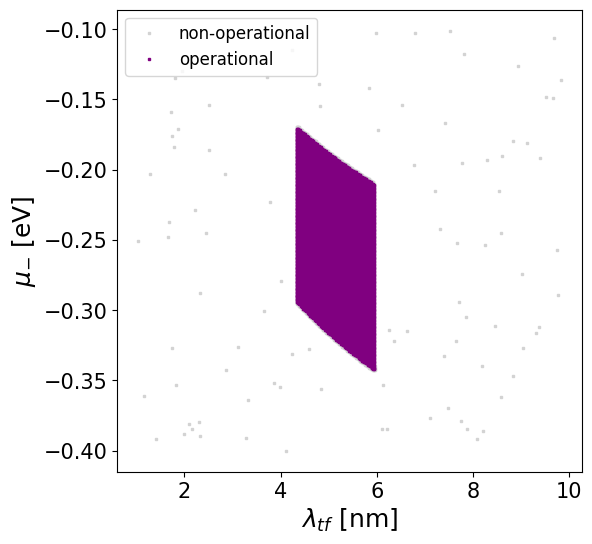

In [73]:
opdom = operational_domain_flood_fill(charge_distribution_surface(or_gate), [create_or_tt()], 100, opdom_params_lambda_mu)
print_operational_domain_lambda_mu(opdom)

<a id='or_operational_domain_fixed_mu'></a>
#### 3.1.2. Operational Domain for fixed $\mu_{-} = -0.25$ eV

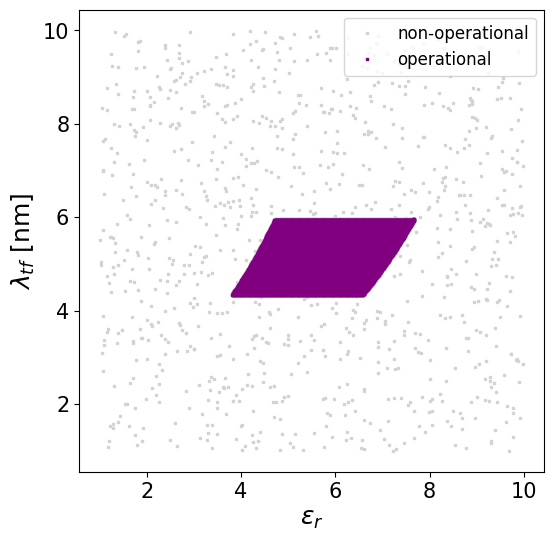

In [47]:
opdom = operational_domain_flood_fill(charge_distribution_surface_100(or_gate), [create_or_tt()], 1000, opdom_params_epsilon_lambda)
print_operational_domain_epsilon_lambda(opdom)

<a id='or_critical_temperature'></a>
## 3.2. Critical Temperature

In [48]:
ct_params = critical_temperature_params()
ct_params.max_temperature = 300
ct_stats = critical_temperature_stats()
critical_temperature_non_gate_based(charge_distribution_surface_100(or_gate), ct_params, ct_stats)
print("The Critical Temperature is \033[1m" + str(ct_stats.critical_temperature) + " Kelvin\033[0m (at higher temperatures, the ground state is occupied with a probability of less than 99 %).")

The Critical Temperature is 12.16 Kelvin (at higher temperatures, the ground state is occupied with a probability of less than 99 %).


<a id='fan_out'></a>
# ``4. Fan-Out Gate``

In [49]:
# we also provide a function to read in sqd-files
fan_out_gate = read_sqd_layout_100('../sidb_gates/sqd/fan_out_v0.sqd')
print(fan_out_gate)

 ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ◯  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 

 ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  ·  · 
 ·  · 

<a id='fan_out_operational_domain'></a>
## 4.1. Operational Domain

<a id='fan_out_operational_domain_fixed_epsilon'></a>
#### 4.1.1. Operational Domain for fixed $\epsilon_{r} = 5.6$

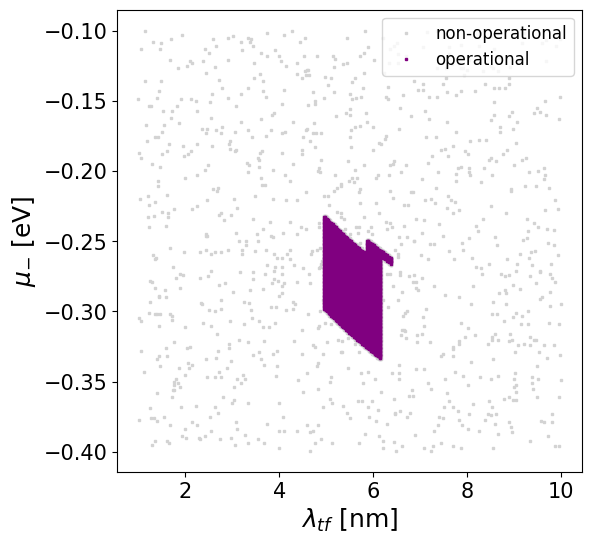

In [51]:
opdom = operational_domain_flood_fill(charge_distribution_surface_100(fan_out_gate), create_fan_out_tt(), 1000, opdom_params_lambda_mu)
print_operational_domain_lambda_mu(opdom)

<a id='fan_out_operational_domain_fixed_mu'></a>
#### 4.1.2. Operational Domain for fixed $\mu_{-} = -0.25$ eV

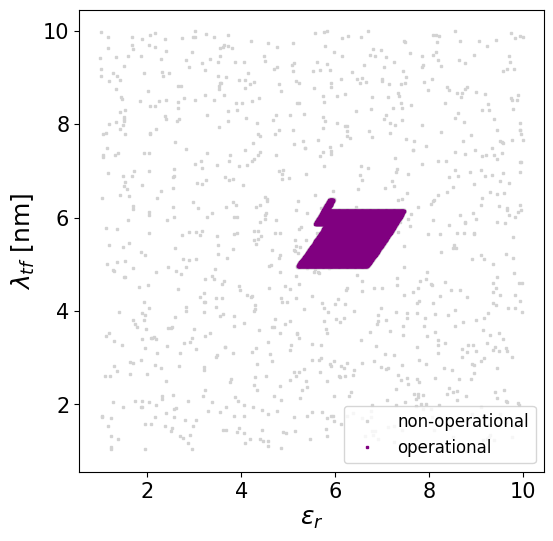

In [52]:
opdom = operational_domain_flood_fill(charge_distribution_surface_100(fan_out_gate), create_fan_out_tt(), 1000, opdom_params_epsilon_lambda)
print_operational_domain_epsilon_lambda(opdom)

<a id='fan_out_critical_temperature'></a>
## 4.2. Critical Temperature

In [54]:
ct_params = critical_temperature_params()
ct_params.max_temperature = 300
ct_stats = critical_temperature_stats()
critical_temperature_non_gate_based(charge_distribution_surface_100(fan_out_gate), ct_params, ct_stats)
print("The Critical Temperature is \033[1m" + str(ct_stats.critical_temperature) + " Kelvin\033[0m (at higher temperatures, the ground state is occupied with a probability of less than 99 %).")

The Critical Temperature is 300.0 Kelvin (at higher temperatures, the ground state is occupied with a probability of less than 99 %).
